### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Data Exploration

In [2]:
df = pd.read_csv("logos.csv")

In [3]:
df

,id,friendly,inviting,interesting,positive,pleasant,sex,logo
0,3,9,8,9,10,9,f,LogoA
1,98,7,6,8,7,7,f,LogoC
2,73,5,3,6,6,6,m,LogoC
3,89,4,5,2,3,4,f,LogoC
4,13,8,7,9,8,6,f,LogoA
...,...,...,...,...,...,...,...,...
95,67,6,5,8,5,4,m,LogoC
96,65,9,9,9,10,8,m,LogoB
97,72,8,9,8,8,8,f,LogoC
98,35,6,7,6,5,6,m,LogoB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           100 non-null    int64 
 1   friendly     100 non-null    int64 
 2   inviting     100 non-null    int64 
 3   interesting  100 non-null    int64 
 4   positive     100 non-null    int64 
 5   pleasant     100 non-null    int64 
 6   sex          100 non-null    object
 7   logo         99 non-null     object
dtypes: int64(6), object(2)
memory usage: 6.4+ KB


In [5]:
df.describe(include='all')

,id,friendly,inviting,interesting,positive,pleasant,sex,logo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,99
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,f,LogoC
freq,NaN,NaN,NaN,NaN,NaN,NaN,67,34
mean,50.500000,8.050000,7.990000,7.930000,8.000000,7.890000,NaN,NaN
std,29.011492,1.520068,1.690705,1.810491,1.797866,1.740167,NaN,NaN
min,1.000000,4.000000,3.000000,2.000000,3.000000,3.000000,NaN,NaN
25%,25.750000,7.000000,7.000000,7.000000,7.000000,7.000000,NaN,NaN
50%,50.500000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN,NaN
75%,75.250000,9.000000,9.000000,10.000000,10.000000,9.250000,NaN,NaN


In [6]:
df.shape

(100, 8)

In [7]:
df.columns

Index(['id', 'friendly', 'inviting', 'interesting', 'positive', 'pleasant',
       'sex', 'logo'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

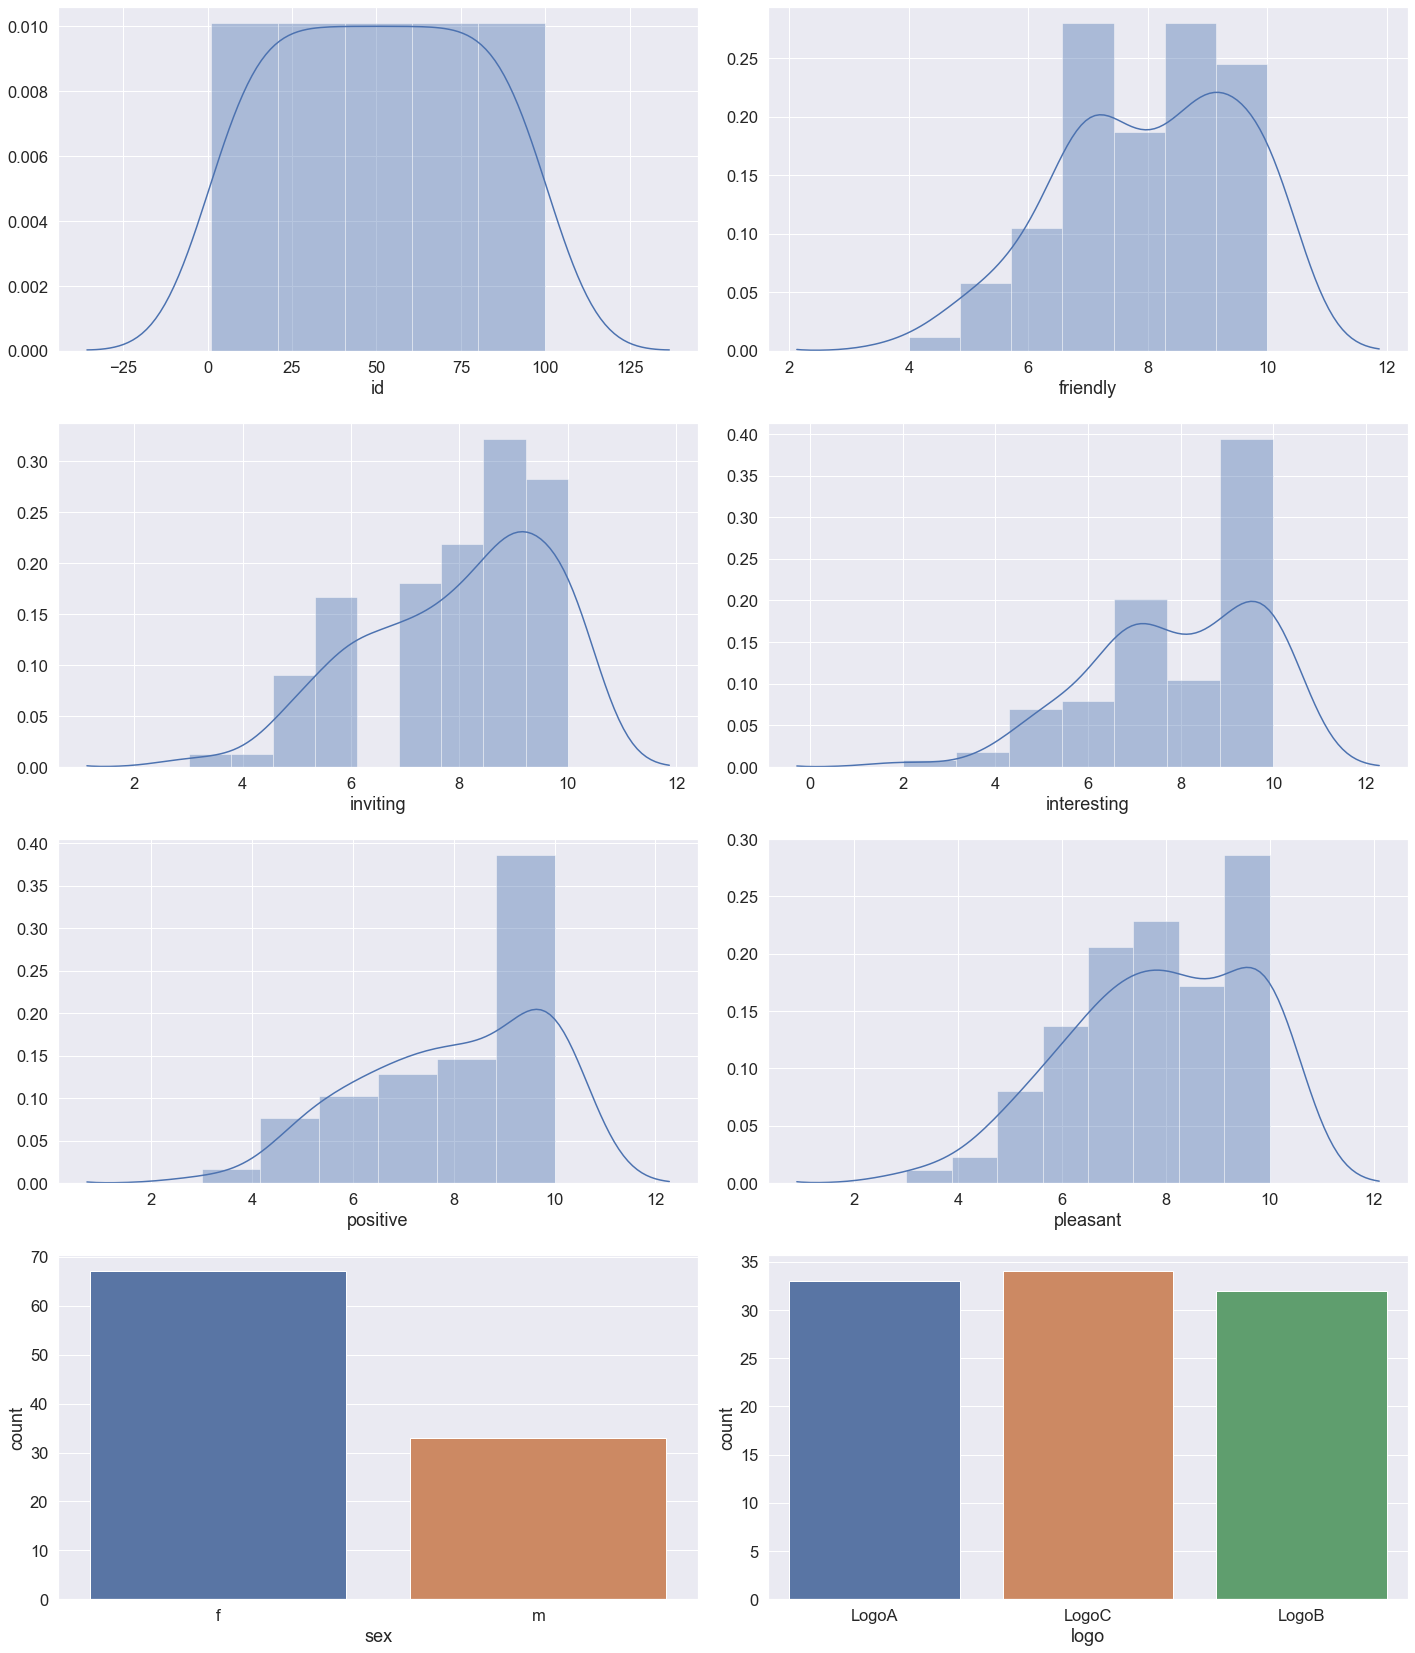

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.id)
plt.subplot(7,2,2)
sns.distplot(df.friendly)
plt.subplot(7,2,3)
sns.distplot(df.inviting)
plt.subplot(7,2,4)
sns.distplot(df.interesting)
plt.subplot(7,2,5)
sns.distplot(df.positive)
plt.subplot(7,2,6)
sns.distplot(df.pleasant)
plt.subplot(7,2,7)
sns.countplot(df.sex)
plt.subplot(7,2,8)
sns.countplot(df.logo)
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

In [9]:
df.corr()

,id,friendly,inviting,interesting,positive,pleasant
id,1.000000,-0.428210,-0.359457,-0.336636,-0.205666,-0.369248
friendly,-0.428210,1.000000,0.857018,0.867483,0.824232,0.853661
inviting,-0.359457,0.857018,1.000000,0.663048,0.697845,0.758371
interesting,-0.336636,0.867483,0.663048,1.000000,0.769596,0.725317
positive,-0.205666,0.824232,0.697845,0.769596,1.000000,0.687695
pleasant,-0.369248,0.853661,0.758371,0.725317,0.687695,1.000000


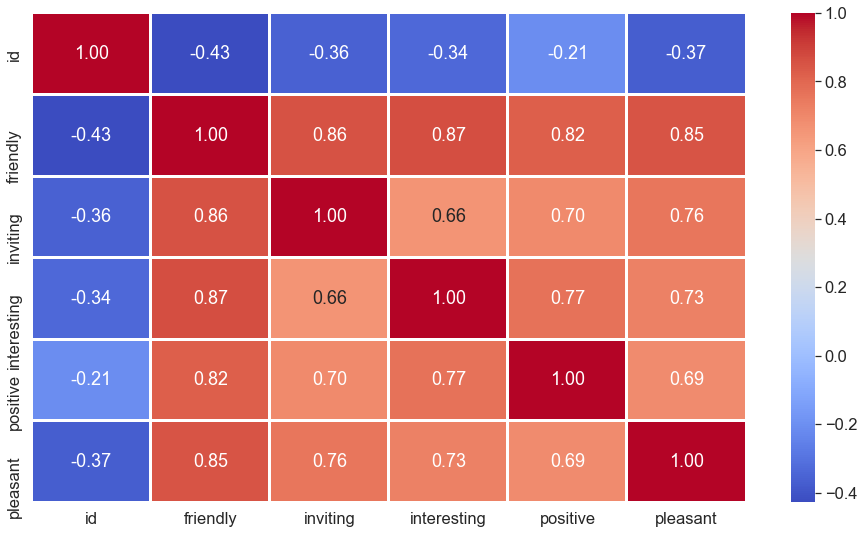

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [11]:
df.isnull().sum()

id             0
friendly       0
inviting       0
interesting    0
positive       0
pleasant       0
sex            0
logo           1
dtype: int64

In [12]:
imputer = mdi.FrequentCategoryImputer(variables='logo')

In [13]:
imputer.fit(df)

FrequentCategoryImputer(variables=['logo'])

In [14]:
df = imputer.transform(df)

In [15]:
df.isnull().sum()

id             0
friendly       0
inviting       0
interesting    0
positive       0
pleasant       0
sex            0
logo           0
dtype: int64

In [16]:
df['logo'].value_counts()

LogoC    35
LogoA    33
LogoB    32
Name: logo, dtype: int64

In [17]:
encoder = LabelEncoder()

In [18]:
df['logo'] = encoder.fit_transform(df['logo'])

In [19]:
df['logo'].value_counts()

2    35
0    33
1    32
Name: logo, dtype: int64

In [20]:
df

,id,friendly,inviting,interesting,positive,pleasant,sex,logo
0,3,9,8,9,10,9,f,0
1,98,7,6,8,7,7,f,2
2,73,5,3,6,6,6,m,2
3,89,4,5,2,3,4,f,2
4,13,8,7,9,8,6,f,0
...,...,...,...,...,...,...,...,...
95,67,6,5,8,5,4,m,2
96,65,9,9,9,10,8,m,1
97,72,8,9,8,8,8,f,2
98,35,6,7,6,5,6,m,1


In [21]:
df2 = pd.get_dummies(df,columns=['sex'],drop_first=True)

In [22]:
df2

,id,friendly,inviting,interesting,positive,pleasant,logo,sex_m
0,3,9,8,9,10,9,0,0
1,98,7,6,8,7,7,2,0
2,73,5,3,6,6,6,2,1
3,89,4,5,2,3,4,2,0
4,13,8,7,9,8,6,0,0
...,...,...,...,...,...,...,...,...
95,67,6,5,8,5,4,2,1
96,65,9,9,9,10,8,1,1
97,72,8,9,8,8,8,2,0
98,35,6,7,6,5,6,1,1


In [23]:
df2.columns

Index(['id', 'friendly', 'inviting', 'interesting', 'positive', 'pleasant',
       'logo', 'sex_m'],
      dtype='object')

In [24]:
df2 = df2[['id', 'friendly', 'inviting', 'interesting', 'positive', 'pleasant','sex_m','logo']]

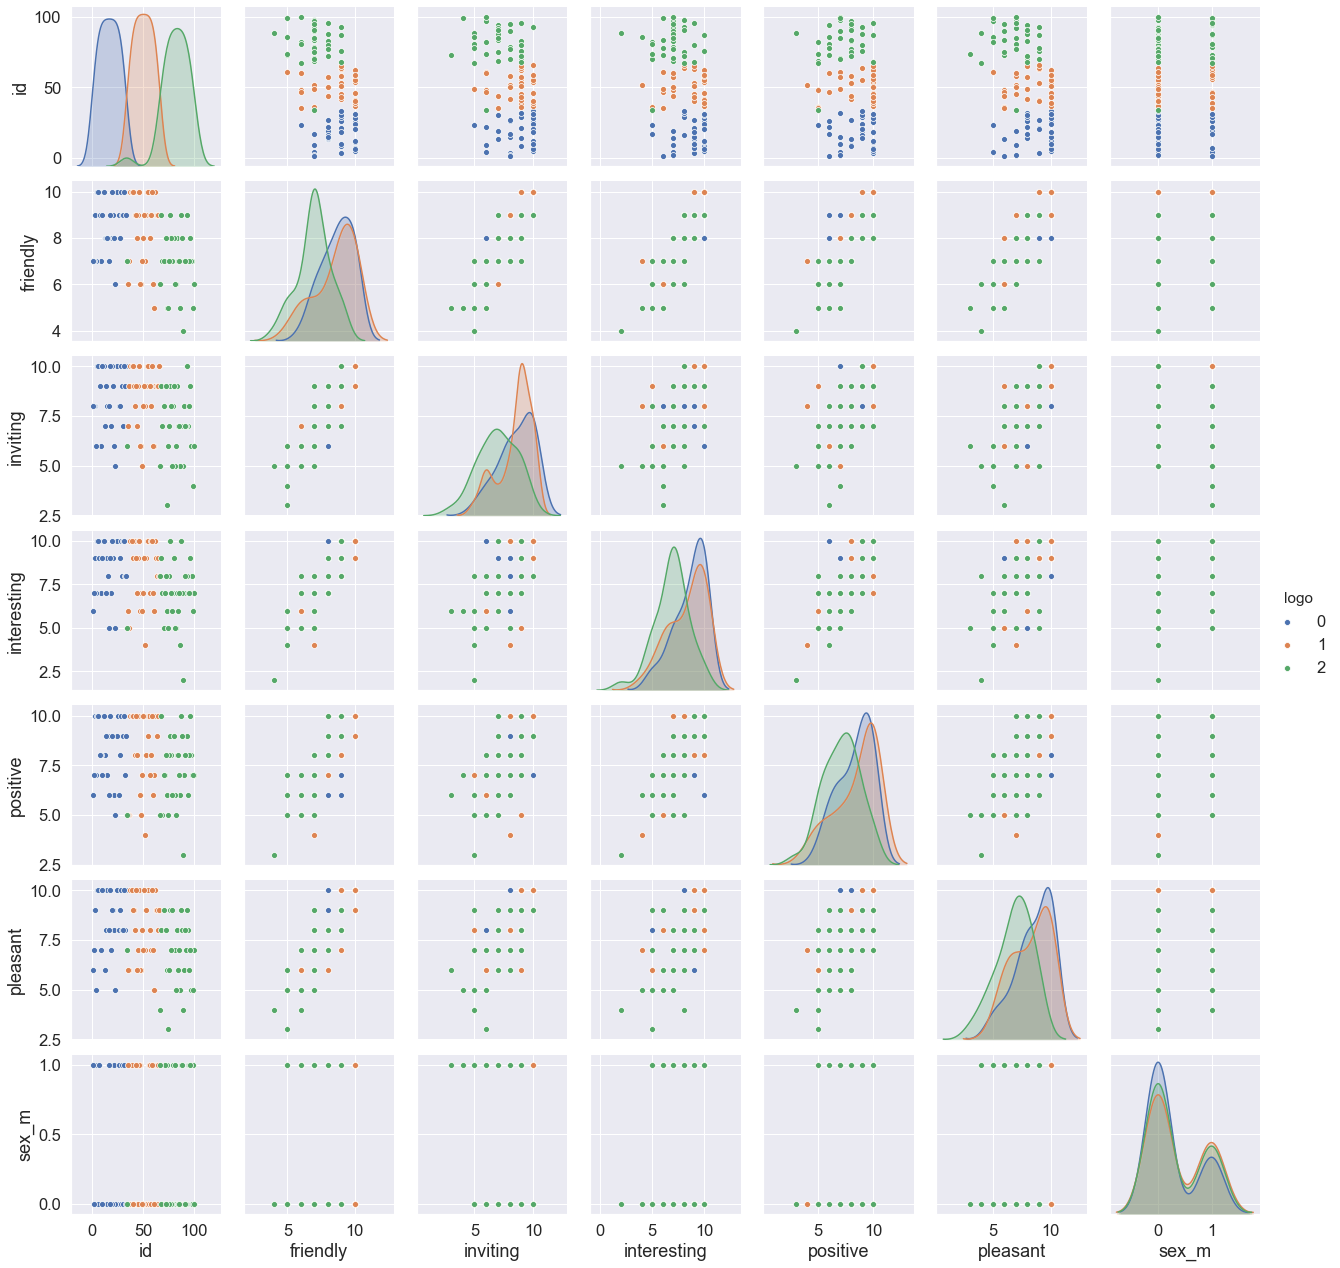

In [25]:
sns.pairplot(df2,vars=df2.columns[:-1],hue='logo')
plt.show()

### Treat Duplicate Values

In [26]:
df2.duplicated(keep='first').sum()

0

### Drop unwanted features

In [27]:
df2.columns

Index(['id', 'friendly', 'inviting', 'interesting', 'positive', 'pleasant',
       'sex_m', 'logo'],
      dtype='object')

In [28]:
df2.drop(['id'],axis=1,inplace=True)

In [29]:
df2

,friendly,inviting,interesting,positive,pleasant,sex_m,logo
0,9,8,9,10,9,0,0
1,7,6,8,7,7,0,2
2,5,3,6,6,6,1,2
3,4,5,2,3,4,0,2
4,8,7,9,8,6,0,0
...,...,...,...,...,...,...,...
95,6,5,8,5,4,1,2
96,9,9,9,10,8,1,1
97,8,9,8,8,8,0,2
98,6,7,6,5,6,1,1


### Create and save processed dataset

In [30]:
#df2.to_csv("logotrain.csv",index=False)

### Train Test Split

In [31]:
X = df2.iloc[:,0:6]
y = df2.iloc[:,6]

### Treat Imbalance Data

In [32]:
y.value_counts()

2    35
0    33
1    32
Name: logo, dtype: int64

In [33]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [34]:
new_X, new_y = ros.fit_resample(X, y)

In [35]:
new_y.value_counts()

2    35
1    35
0    35
Name: logo, dtype: int64

In [36]:
new_X

,friendly,inviting,interesting,positive,pleasant,sex_m
0,9,8,9,10,9,0
1,7,6,8,7,7,0
2,5,3,6,6,6,1
3,4,5,2,3,4,0
4,8,7,9,8,6,0
...,...,...,...,...,...,...
100,9,8,9,10,9,0
101,9,9,9,9,9,0
102,10,10,10,10,10,1
103,7,9,5,5,6,0


In [37]:
new_X.values, new_y.values

(array([[ 9,  8,  9, 10,  9,  0],
        [ 7,  6,  8,  7,  7,  0],
        [ 5,  3,  6,  6,  6,  1],
        [ 4,  5,  2,  3,  4,  0],
        [ 8,  7,  9,  8,  6,  0],
        [ 8,  7,  7,  9,  7,  1],
        [ 9,  8, 10,  8,  8,  0],
        [ 9,  9,  9,  9,  9,  0],
        [ 5,  5,  4,  6,  5,  0],
        [10,  9, 10, 10, 10,  0],
        [10, 10, 10, 10, 10,  0],
        [ 9,  9,  9, 10,  9,  0],
        [ 7,  6,  7,  8,  7,  0],
        [ 7,  7,  7,  6,  8,  1],
        [ 7,  7,  7,  5,  8,  0],
        [ 7,  8,  7,  6,  7,  1],
        [ 8,  6, 10,  6,  8,  1],
        [ 7,  6,  7,  7,  5,  1],
        [ 9,  7, 10, 10,  9,  1],
        [10, 10,  9, 10, 10,  1],
        [ 7,  9,  5,  5,  6,  0],
        [ 6,  6,  7,  5,  6,  0],
        [ 9, 10,  8,  9,  9,  0],
        [ 6,  6,  6,  6,  6,  1],
        [ 8,  8,  8,  9,  8,  0],
        [10, 10, 10, 10, 10,  0],
        [ 7,  6,  7,  8,  5,  1],
        [ 8,  9,  7,  8,  8,  0],
        [ 7,  6,  5,  5,  7,  0],
        [10,  

In [38]:
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((84, 6), (21, 6), (84,), (21,))

### Model Training

### Using XGBoost (Scikit-Learn)

In [40]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='multi:softmax')

In [41]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='merror',early_stopping_rounds=20)

[0]	validation_0-merror:0.47619
Will train until validation_0-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.52381
[2]	validation_0-merror:0.47619
[3]	validation_0-merror:0.47619
[4]	validation_0-merror:0.428571
[5]	validation_0-merror:0.52381
[6]	validation_0-merror:0.619048
[7]	validation_0-merror:0.619048
[8]	validation_0-merror:0.619048
[9]	validation_0-merror:0.666667
[10]	validation_0-merror:0.666667
[11]	validation_0-merror:0.619048
[12]	validation_0-merror:0.666667
[13]	validation_0-merror:0.666667
[14]	validation_0-merror:0.619048
[15]	validation_0-merror:0.619048
[16]	validation_0-merror:0.619048
[17]	validation_0-merror:0.619048
[18]	validation_0-merror:0.619048
[19]	validation_0-merror:0.619048
[20]	validation_0-merror:0.619048
[21]	validation_0-merror:0.619048
[22]	validation_0-merror:0.619048
[23]	validation_0-merror:0.619048
[24]	validation_0-merror:0.619048
Stopping. Best iteration:
[4]	validation_0-merror:0.428571



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
y_pred = xgbmodel.predict(X_test)

In [43]:
y_pred

array([2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2])

### Model Evaluation

In [44]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[5, 0, 1],
       [3, 0, 0],
       [2, 3, 7]], dtype=int64)

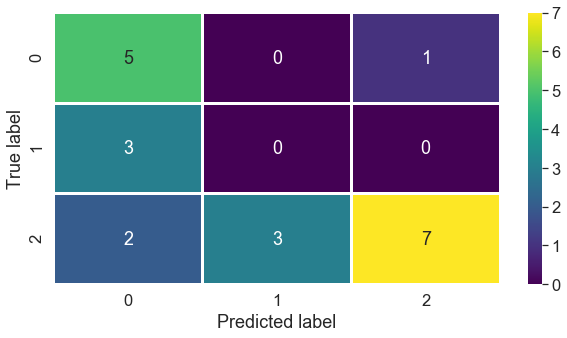

In [45]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

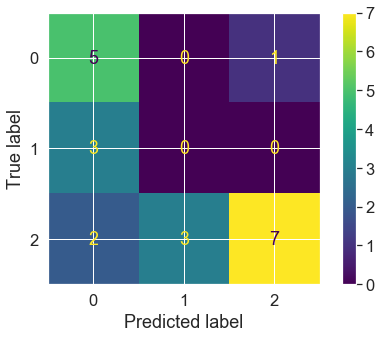

In [46]:
fig , ax = plt.subplots(figsize=(8,5))
plot_confusion_matrix(xgbmodel,X_test,y_test,values_format='.4g',ax=ax)
plt.show()

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.00      0.00      0.00         3
           2       0.88      0.58      0.70        12

    accuracy                           0.57        21
   macro avg       0.46      0.47      0.44        21
weighted avg       0.64      0.57      0.58        21



### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [48]:
X.columns

Index(['friendly', 'inviting', 'interesting', 'positive', 'pleasant', 'sex_m'], dtype='object')

In [49]:
xgbmodel.get_booster().feature_names = ['friendly', 'inviting', 'interesting', 'positive', 'pleasant', 'sex_m']

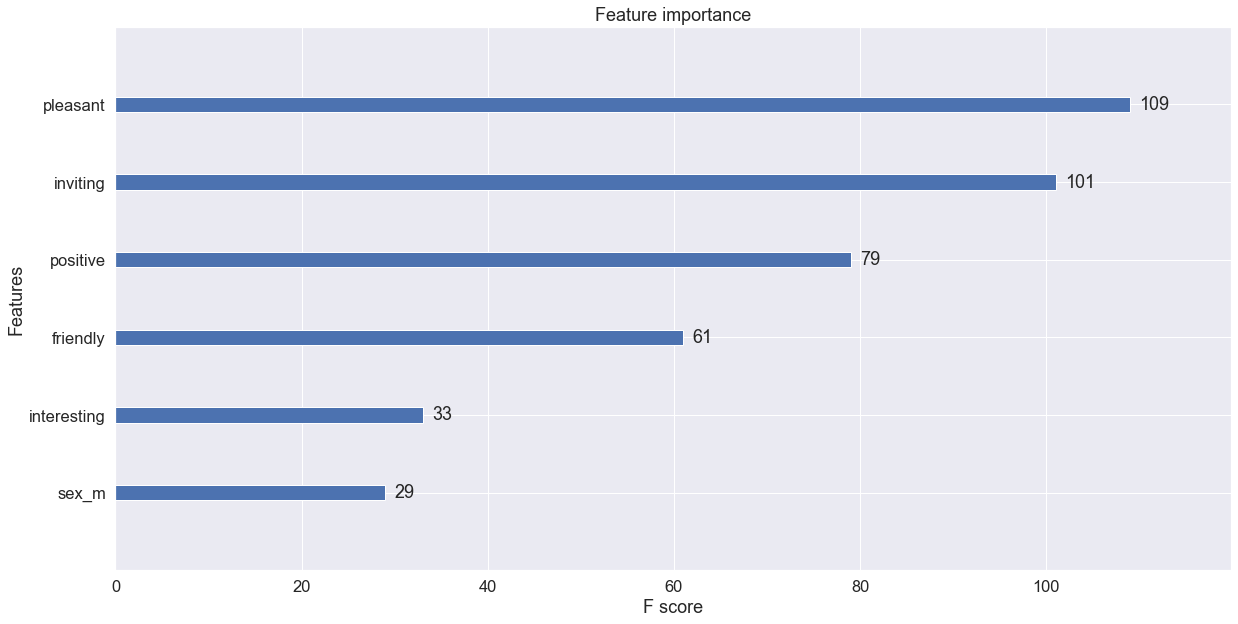

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

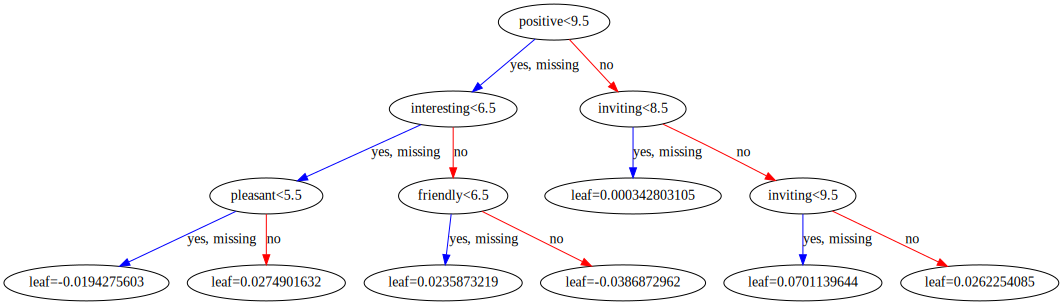

In [51]:
xgb.to_graphviz(xgbmodel,num_trees=10)

### Cross-Validation

In [52]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [53]:
cv.mean()

0.4699999999999999